In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix, r2_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import tree

In [8]:
data = pd.read_csv('/home/lionex/bin/Python/Machine-Learning-Lab/Datasets/Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: >

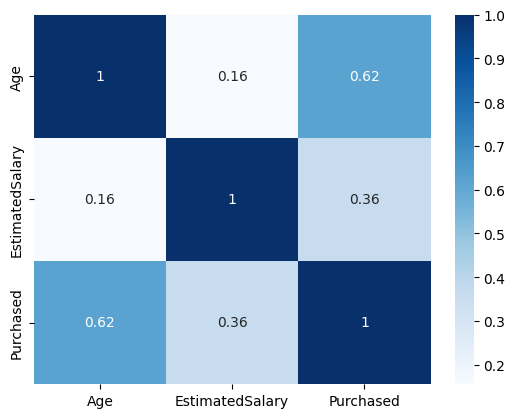

In [9]:
sns.heatmap(data.corr(), cmap='Blues', annot=True)

In [10]:
X = data[['Age','EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

In [11]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [12]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Test Data')
print('Accuracy of the model = '+str(r2_score(y_pred,y_test)))
print('Recall Value='+str(recall_score(y_pred,y_test)))
print('Precision of the model='+str(precision_score(y_pred,y_test)))
print('F measure='+str(f1_score(y_pred,y_test)))

Test Data
Accuracy of the model = 0.6086652690426275
Recall Value=0.8148148148148148
Precision of the model=0.9166666666666666
F measure=0.8627450980392156


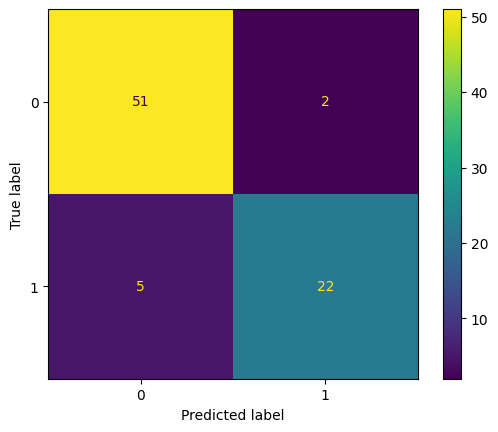

In [13]:
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()

In [14]:
y_pred = model.predict(X_train)
print('Train Data')
print('Accuracy of the model = '+str(r2_score(y_pred,y_train)))
print('Recall Value='+str(recall_score(y_pred,y_train)))
print('Precision of the model='+str(precision_score(y_pred,y_train)))
print('F measure='+str(f1_score(y_pred,y_train)))

Train Data
Accuracy of the model = 0.9865749286793086
Recall Value=1.0
Precision of the model=0.9915966386554622
F measure=0.9957805907172996


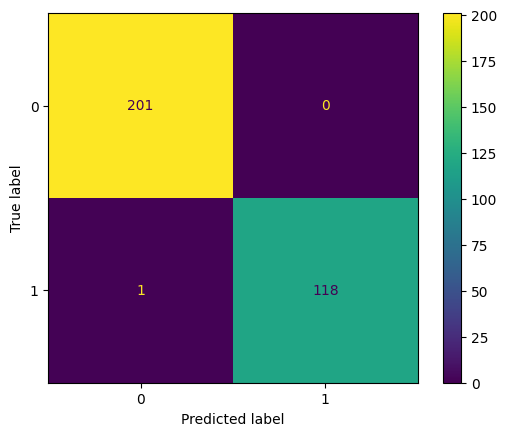

In [15]:
cm = confusion_matrix(y_train,y_pred)
ConfusionMatrixDisplay(cm).plot()

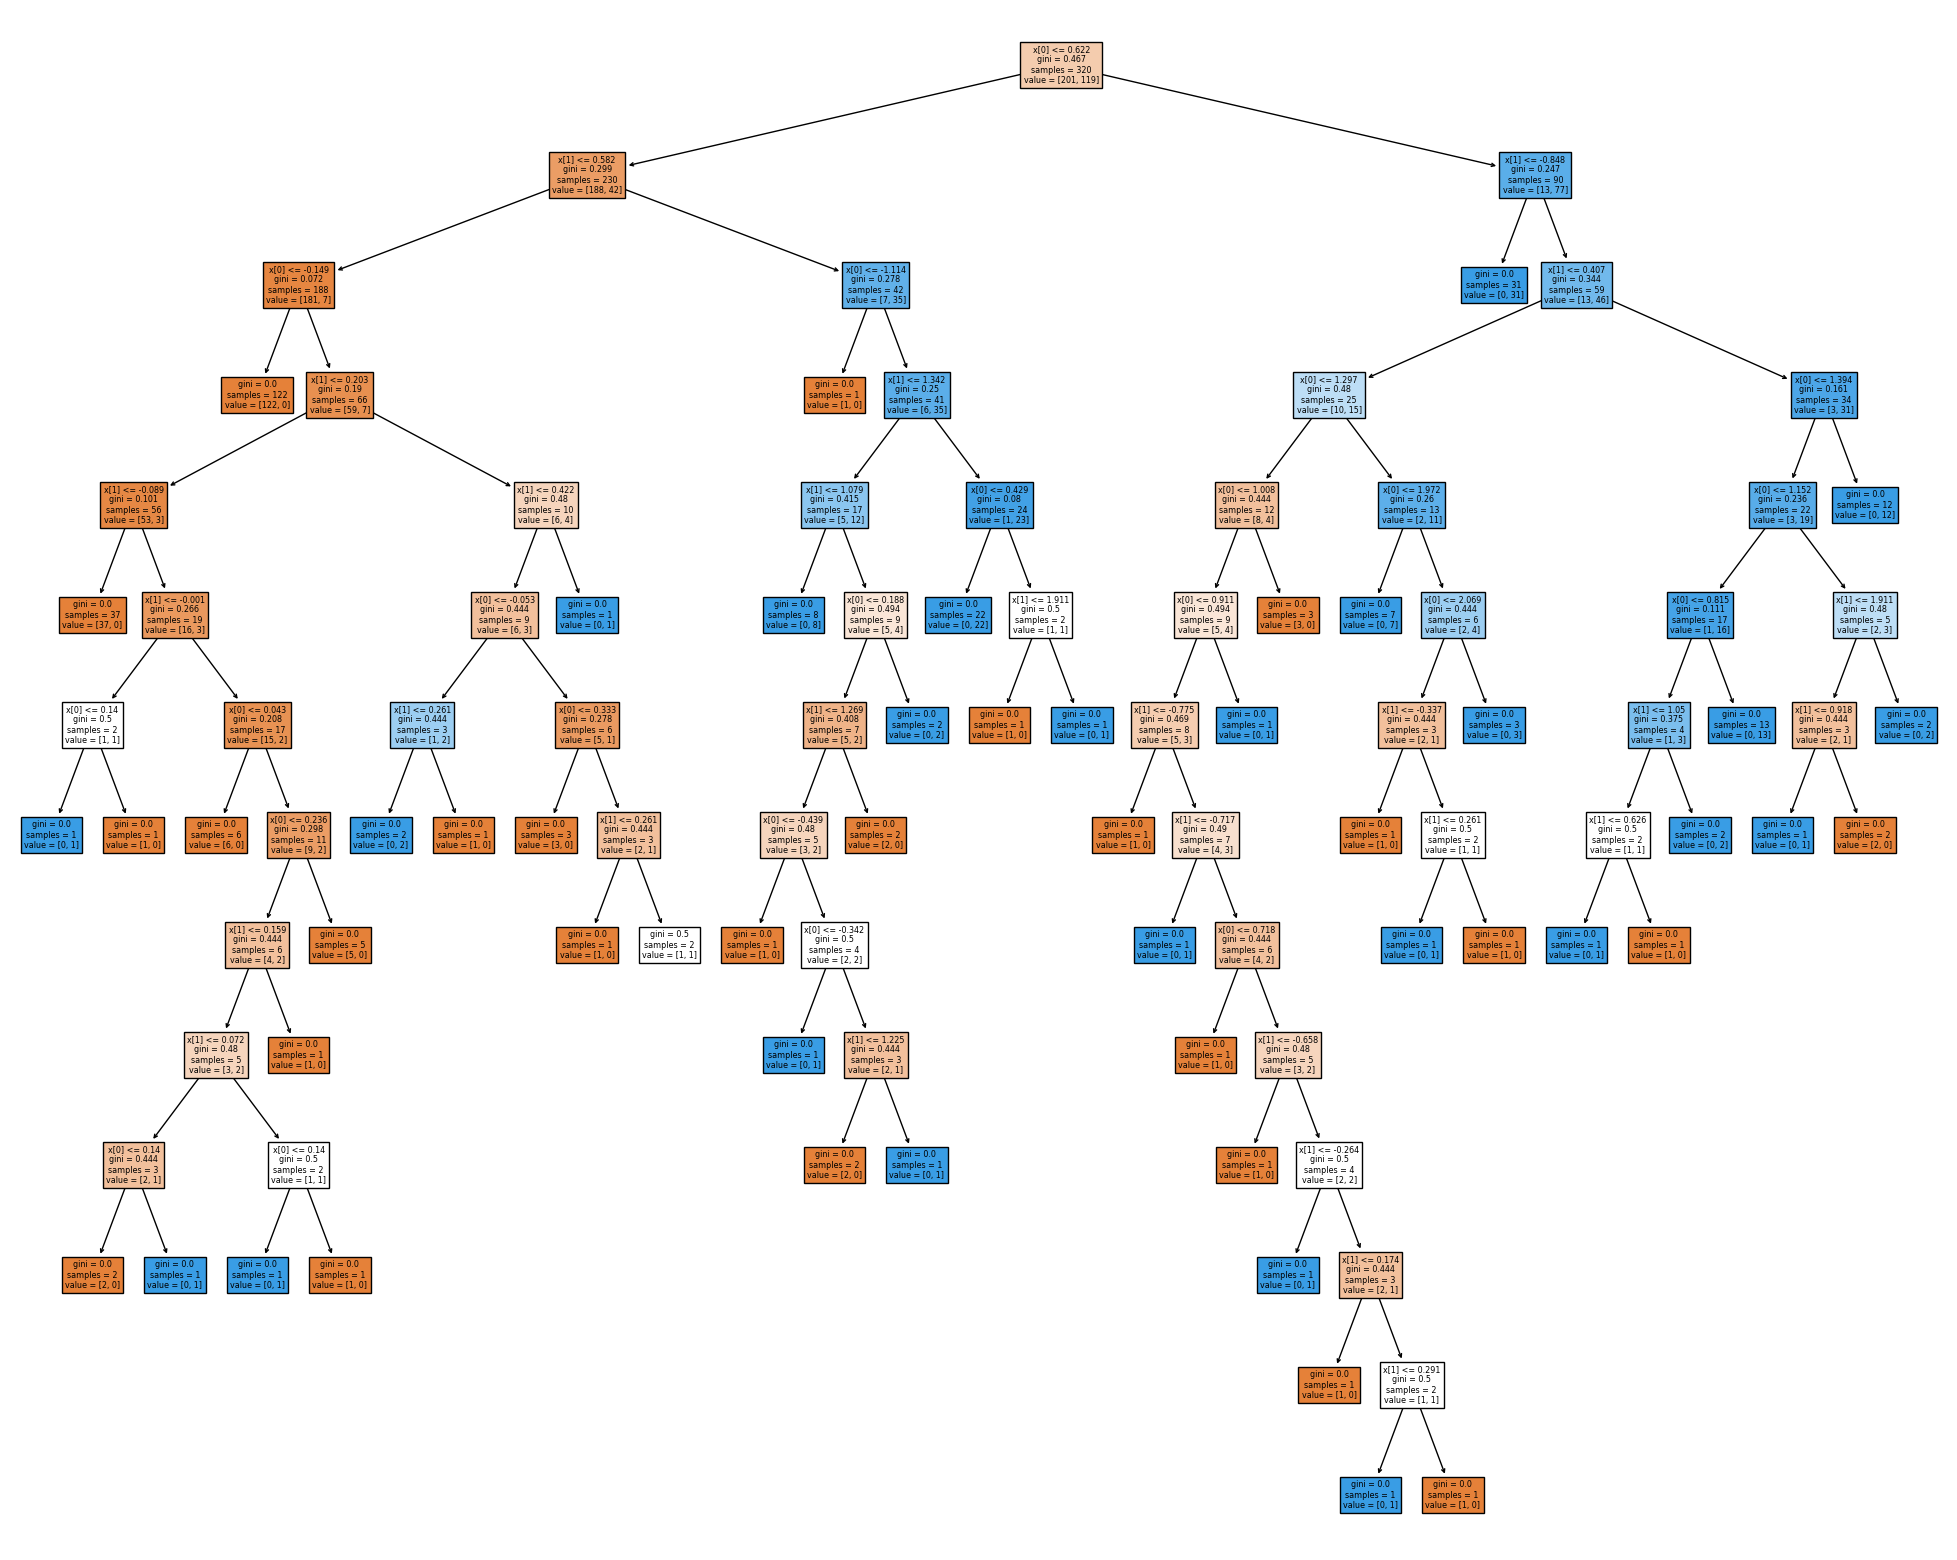

In [16]:
fig = plt.figure(figsize=(25,20))
tr = tree.plot_tree(model, filled=True)
